# Exploratory structural equation modelling {#sec-esem-sem}

::: {.chapterintro data-latex=""}
L'*Exploratory Structural Equation Modeling* (ESEM) è una tecnica statistica che combina i vantaggi dell'analisi fattoriale esplorativa (EFA) e dell'analisi fattoriale confermativa (CFA). Sviluppato da Asparouhov e Muthén nel 2009 e successivamente approfondito da Marsh et al. (2009, 2014), ESEM consente di esaminare strutture fattoriali complesse, permettendo al contempo il test e la valutazione del modello. Questa tecnica è particolarmente utile quando gli item possiedono multiple fonti di varianza, come osservato da Morin et al. (2013), poiché offre un migliore adattamento del modello, riduce le correlazioni inflazionate tra i fattori e consente una rappresentazione significativa delle saturazioni fattoriali incrociate. 
:::

**Prerequisiti**

- Leggere l'articolo: 
    - Marsh, H., & Alamer, A. (2024). When and how to use set‐exploratory structural equation modelling to test structural models: A tutorial using the R package lavaan. *British Journal of Mathematical and Statistical Psychology*, *77*, 459--476.

**Concetti e Competenze Chiave**

- Comprensione delle differenze tra l'ESEM completo e il set-ESEM, con quest'ultimo come compromesso tra CFA e ESEM per gestire specifici blocchi indipendenti di variabili.
- Giustificazione dell'uso del set-ESEM nei modelli strutturali come alternativa al CFA.
- Identificazione degli effetti distorti e dei coefficienti di percorso attenuati nei modelli CFA a causa della multicollinearità, e come il set-ESEM riduce questo problema.
- Uso dell'invarianza di misura nei modelli longitudinali per garantire la stabilità delle misurazioni nel tempo, applicabile in set-ESEM.
- Benefici del set-ESEM, inclusi miglior fit del modello, validità discriminante più accurata e riduzione degli errori di tipo II nei modelli strutturali.
- Implementazione pratica in R con lavaan.

**Preparazione del Notebook**

In [27]:
here::here("code", "_common.R") |>
    source()

# Load packages
if (!requireNamespace("pacman")) install.packages("pacman")
pacman::p_load(semTools, tidyr, psych, lavaan, kableExtra, stringr)

## Introduzione

Numerosi ricercatori hanno riportato che l'ESEM supera il CFA in diversi campi della psicologia, tra cui la psicologia clinica, della salute, industriale (Marsh et al., 2014), e quella educativa (Alamer, Al Khateeb, & Jeno, 2023; Alamer & Marsh, 2022; Alamer, Morin, et al., 2023; Guay et al., 2015; Kruk et al., 2023). Tuttavia, in alcuni contesti empirici, è necessario introdurre restrizioni al modello ESEM completamente libero. Questo ha portato allo sviluppo del set-ESEM (Marsh et al., 2020), che rappresenta un equilibrio tra ESEM e CFA in un unico quadro analitico. In questo capitolo introdurremo la tecnica della *Exploratory structural equation modelling* (ESEM) seguendo il tutorial proposto da @marsh2024and.

## EFA , CFA , ESEM e SET-­ESEM

L'analisi fattoriale esplorativa (EFA) e l'analisi fattoriale confermativa (CFA) rappresentano i due principali approcci per studiare le strutture latenti. L'EFA risale ai lavori di Spearman (1904) e Thurstone (1935, 1947), che inizialmente la chiamavano semplicemente "analisi fattoriale." Solo con l'arrivo della CFA si iniziò a distinguere tra EFA (esplorativa) e CFA (confermativa). La CFA, infatti, è divenuta popolare perché consente di valutare l'adattamento del modello, trattare i dati mancanti con metodi avanzati e confrontare modelli teorici alternativi. Tuttavia, uno dei limiti principali della CFA è la rigida ipotesi che ogni item carichi solo su un singolo fattore, escludendo possibili carichi incrociati.

Questo limite della CFA ha portato allo sviluppo dell'ESEM (Exploratory Structural Equation Modeling) da parte di Asparouhov e Muthén (2009), che combina i vantaggi della SEM con la flessibilità dell'EFA. L'ESEM consente di integrare SEM con carichi incrociati tra i fattori, adattandosi così meglio ai dati psicometrici complessi. Questo approccio si è rivelato superiore alla CFA in numerosi studi per la capacità di migliorare l'adattamento del modello e sostenere la validità discriminante tra i fattori. Recentemente, Gegenfurtner (2022) ha confermato con una meta-analisi su 158 studi che l'ESEM supera la CFA per la bontà di adattamento e la validità discriminante.

Tuttavia, in alcune situazioni, l'ESEM può risultare meno parsimonioso della CFA, e per questo è stato sviluppato il set-ESEM (Marsh et al., 2020). Il set-ESEM consente di bilanciare la flessibilità dell'ESEM con la struttura più rigorosa della CFA, utilizzando tecniche di rotazione come la rotazione geomin o il target rotation per limitare i carichi incrociati non essenziali.

L'ESEM è molto diffuso nella psicometria corrente, dove ha mostrato risultati superiori rispetto alla CFA per comprendere le strutture fattoriali complesse. L'ESEM consente una rappresentazione accurata delle correlazioni e delle regressioni tra fattori, utilizzando tutti i dati disponibili a livello degli indicatori.

::: {#fig-set-esem}
![](../../figures/cfa_esem_set_esem.png){width="80%"}
CFA, ESEM completo e set-ESEM. Nota: le linee tratteggiate indicano i carichi incrociati non target. [Figura tratta da @marsh2024and]
:::

## Situazioni dove Set-ESEM è Preferibile a ESEM

Esistono comunque situazioni in cui l'ESEM completo potrebbe non essere la scelta migliore per un'analisi. Questo accade quando un insieme di fattori e item dovrebbe allinearsi e distinguersi da altri insiemi non pertinenti. In questi casi, è possibile creare mini-set di ESEM all'interno di un modello più ampio, un approccio noto come set-ESEM (Marsh et al., 2020). Il set-ESEM rappresenta uno sviluppo recente nell’analisi fattoriale, ideato per raggiungere un compromesso ottimale tra CFA ed ESEM completo in termini di indici di adattamento del modello, parsimonia, struttura confermativa e un modello di misurazione ben definito. In alcune situazioni, il set-ESEM può risultare più adeguato dell'ESEM completo. Qui descriviamo due esempi con dati reali e analisi empiriche.

Il primo riguarda il caso in cui un ricercatore raccoglie dati su item relativi a costrutti concettualmente distinti o appartenenti a teorie diverse. Ad esempio, consideriamo un dataset contenente item che misurano autonomia, competenza e relazionalità delle tre necessità psicologiche di base (Ryan & Deci, 2017) tramite la scala BPN-L2 (Alamer, 2022), e due costrutti, perseveranza nello sforzo e coerenza dell’interesse, derivati dalla teoria del grit (Duckworth et al., 2007) e misurati con la scala L2-grit (Alamer, 2021b). In questo caso, risulterebbe inappropriato stimare carichi incrociati tra item del grit e quelli delle tre necessità psicologiche, poiché ogni teoria attribuisce funzioni differenti ai propri costrutti e item: ad esempio, i fattori delle necessità psicologiche di base sono teorizzati come influenzati dal contesto sociale, mentre il grit è considerato un tratto stabile della personalità. In queste circostanze, il ricercatore potrebbe preferire due blocchi (o set) ESEM: uno per i tre fattori delle necessità psicologiche, con carichi incrociati tra loro ma non con gli item del grit, e un secondo set per i due fattori del grit senza carichi incrociati con le necessità psicologiche. Questo approccio consente un modello più parsimonioso, bilanciando esame teorico e test empirico.

La seconda situazione in cui l'uso del set-ESEM è consigliato riguarda il caso in cui i dati provengano da costrutti rilevanti raccolti in più momenti temporali. Qui, i carichi incrociati dovrebbero essere stimati solo tra i costrutti nidificati nello stesso momento temporale. Per esempio, consideriamo un dataset che contiene la passione armoniosa, la passione ossessiva e l'autonomia misurate in due tempi distinti. Questi costrutti sono concettualmente correlati, per cui i carichi incrociati sono ragionevoli all'interno dello stesso tempo. Tuttavia, permettere che i carichi incrociati tra item del primo tempo influenzino quelli del secondo sarebbe teoricamente inappropriato e tecnicamente poco desiderabile, rischiando di creare effetti di confondimento. Inoltre, è consuetudine nelle analisi longitudinali SEM correlare i residui degli stessi item nel tempo (Marsh & Hau, 1996). L'applicazione del set-ESEM in tali casi consente di mantenere la flessibilità dell'ESEM con la rigore e parsimonia della CFA.

Nelle sezioni successive, riportiamo due studi per illustrare questi scenari, dimostrando come il set-ESEM possa rappresentare un'alternativa preferibile al sistema restrittivo della CFA. Per quanto riguarda gli indici di affidabilità, si raccomanda che i ricercatori riportino il coefficiente omega (ω) per la composita affidabilità del modello. Essendo questa una dimostrazione metodologica, ci focalizziamo più sulle analisi che sulla discussione teorica.

Nei due esempi discussi da @marsh2024and, i partecipanti erano studenti sauditi che imparano l’inglese come L2 in un’università pubblica saudita e hanno partecipato tramite un questionario online. Nel primo studio hanno partecipato 269 studenti, mentre nel secondo 389. Tutti gli studenti, di età compresa tra i 18 e i 20 anni (M = 18.5), parlavano l’arabo come lingua madre. 

## Studio 1

Lo Studio 1 affronta il primo scenario in cui un ricercatore potrebbe avere costrutti derivati da teorie o livelli concettuali differenti. Nel nostro caso, abbiamo due blocchi teorici. 

- Il primo include tre costrutti derivati dalla teoria delle necessità psicologiche di base (BPN): autonomia, competenza e relazionalità (vedi Noels, 2023; Ryan & Deci, 2017). In particolare, la misura è costituita dalla percezione degli studenti sull'insegnante di inglese come promotore di questi tre fattori BPN. 
- Il secondo blocco rappresenta diversi risultati associati alla teoria BPN, come senso di significato, senso di sicurezza e motivazione intrinseca. La ricerca suggerisce che, quando gli studenti percepiscono il proprio insegnante come un promotore delle BPN, si osserva una maggiore motivazione intrinseca, senso di significato e sicurezza (Alamer, 2022; Alamer & Al Khateeb, 2023; Alamer, Al Khateeb, & Jeno, 2023; Guay et al., 2015; Noels, 2023). 

In questo studio, ai partecipanti è stato chiesto di indicare la propria percezione dell'insegnante come promotore delle tre BPN, mentre per il senso di significato, sicurezza e motivazione intrinseca i partecipanti hanno risposto sulla propria percezione di sé. Questa distinzione giustifica l’assenza di carichi incrociati tra variabili che misurano aspetti di "self-sense" (ovvero, senso di significato, sicurezza e motivazione intrinseca), poiché ogni blocco ha un significato concettuale distinto. È difficile giustificare concettualmente carichi incrociati tra costrutti che riguardano l'insegnante e quelli legati alla percezione di sé. Infine, l'intenzione di abbandonare il corso viene usata come variabile di esito nel modello. I due modelli alternativi sono presentati nella Figura seguente.

::: {#fig-set-esem-cfa}
![](../../figures/set_esem_cfa.png){width="90%"}
Set-ESEM (modello A) e CFA (modello B). Nota: le linee tratteggiate indicano i carichi incrociati non target. [Figura tratta da @marsh2024and]
:::

**Strumenti di Misura**

È stata utilizzata la scala BPN-L2 (Alamer, 2022), con tre item per ciascun costrutto. Esempi di item includono: "Il mio insegnante ci permette di scegliere i compiti di apprendimento linguistico" (autonomia; ω = .75), "Il mio insegnante ci dice che siamo capaci di imparare l'inglese" (competenza; ω = .75) e "Il mio insegnante di inglese è amichevole e cordiale con noi" (relazionalità; ω = .91). 

Per la motivazione intrinseca, sono stati adottati tre item dalla scala SDT-L2 (Alamer, 2022), ad esempio: "Imparo l'inglese perché mi piace" (ω = .91). Tre item per il senso di sicurezza e tre per il significato sono stati presi da Dörnyei e Ushioda (2021) e da Dörnyei e Ryan (2015). Un esempio di item per il senso di sicurezza è "Credo nelle mie capacità di fare bene nel corso" (ω = .74) e per il significato "So perché mi sono iscritto a questo corso" (ω = .91). 

Per misurare l’intenzione di abbandonare il corso sono stati adottati cinque item di Lounsbury et al. (2004), come: "Non ho intenzione di continuare a studiare in questo settore" (ω = .90). Le misure sono basate su una scala Likert a cinque punti, da 1 (fortemente in disaccordo) a 5 (fortemente d'accordo).

**Codice lavaan per il modello ESEM**

Importiamo i dati e esaminiamo le variabili.

In [5]:
study1_dat <- rio::import(
    here::here(
        "data", "marsh_alamer", "Study_1_data.csv"
    )
)

glimpse(study1_dat)

Rows: 269
Columns: 23
$ Intent_to_withdraw1 <int> 2, 2, 4, 4, 5, 1, 4, 2, 1, 5, 2, 4, 5, 5, 3, 5~
$ Intent_to_withdraw2 <int> 2, 3, 4, 5, 5, 1, 3, 4, 1, 5, 2, 5, 5, 5, 4, 5~
$ Intent_to_withdraw3 <int> 1, 2, 1, 4, 5, 1, 3, 1, 1, 5, 2, 3, 4, 4, 3, 4~
$ Intent_to_withdraw4 <int> 2, 2, 3, 5, 5, 1, 3, 2, 2, 4, 2, 4, 4, 4, 5, 4~
$ Intent_to_withdraw5 <int> 3, 3, 4, 4, 4, 1, 4, 2, 1, 5, 2, 4, 4, 4, 4, 4~
$ T_relatedness1      <int> 4, 4, 2, 2, 2, 5, 1, 4, 4, 4, 4, 4, 1, 1, 1, 1~
$ T_relatedness2      <int> 3, 4, 2, 2, 1, 5, 1, 4, 4, 2, 4, 3, 1, 1, 1, 1~
$ T_relatedness3      <int> 3, 5, 2, 2, 2, 5, 1, 4, 4, 4, 4, 4, 1, 1, 3, 1~
$ T_competence1       <int> 4, 5, 2, 4, 3, 5, 5, 4, 2, 4, 3, 4, 2, 2, 3, 2~
$ T_competence2       <int> 4, 4, 2, 3, 3, 5, 5, 5, 2, 4, 4, 4, 2, 2, 4, 2~
$ T_competence3       <int> 4, 5, 1, 4, 3, 5, 4, 4, 2, 4, 3, 3, 2, 2, 4, 2~
$ T_autonomy1         <int> 4, 5, 2, 2, 4, 5, 3, 4, 4, 4, 4, 4, 2, 2, 2, 2~
$ T_autonomy2         <int> 3, 5, 2, 3, 3, 5, 1, 4, 4, 4, 4, 3, 3,

Definiamo il modello ESEM.

In [6]:
esem1 <- '

  # the long format (more flexible) each factor is defined separately
  efa("teacher")*Teacher_autonomy =~ T_autonomy1 + T_autonomy2 + T_autonomy3 + T_competence1 + T_competence2 + T_competence3 + T_relatedness1 + T_relatedness2 + T_relatedness3
  efa("teacher")*Teacher_competence =~ T_autonomy1 + T_autonomy2 + T_autonomy3 + T_competence1 + T_competence2 + T_competence3 + T_relatedness1 + T_relatedness2 + T_relatedness3
  efa("teacher")*Teacher_relatedness =~ T_autonomy1 + T_autonomy2 + T_autonomy3 + T_competence1 + T_competence2 + T_competence3 + T_relatedness1 + T_relatedness2 + T_relatedness3

  # the short format (less flexible) all factors defined in one instance (remove ”##” if you want to use this)
  # efa("teacher")*Teacher_autonomy +
  # efa("teacher")*Teacher_competence +
  # efa("teacher")*Teacher_relatedness =~ T_autonomy1 + T_autonomy2 + T_autonomy3 + T_competence1 + T_competence2 + T_competence3 + T_relatedness1 + T_relatedness2 + T_relatedness3

  # defining the second ESEM block
  efa("self")*Self_Meaning =~ S_meaning1 + S_meaning2 + S_meaning3 + S_confidence1 + S_confidence2 + S_confidence3 + S_Intrinsic1 + S_Intrinsic2+S_Intrinsic3
  efa("self")*Self_Confidence =~ S_meaning1 + S_meaning2 + S_meaning3 + S_confidence1 + S_confidence2 + S_confidence3 + S_Intrinsic1 + S_Intrinsic2+S_Intrinsic3
  efa("self")*Intrinsic_Motivation =~ S_meaning1 + S_meaning2 + S_meaning3 + S_confidence1 + S_confidence2 + S_confidence3 + S_Intrinsic1 + S_Intrinsic2+S_Intrinsic3

  # defining the outcome variable
  Intent_to_Quit =~ Intent_to_withdraw1 + Intent_to_withdraw2 + Intent_to_withdraw3 + Intent_to_withdraw4 + Intent_to_withdraw5

  # defining the structural part
  Self_Meaning ~ Teacher_autonomy + Teacher_competence + Teacher_relatedness
  Self_Confidence ~ Teacher_autonomy + Teacher_competence + Teacher_relatedness
  Intrinsic_Motivation ~ Teacher_autonomy + Teacher_competence + Teacher_relatedness
  Intent_to_Quit ~ Self_Meaning + Self_Confidence + Intrinsic_Motivation +
                   Teacher_autonomy + Teacher_competence + Teacher_relatedness
'

In [7]:
out1 <- sem(
    model = esem1,
    data = study1_dat,
    estimator = "MLR", # verbose = TRUE, test = "yuan.bentler",
    rotation = "geomin",
    rotation.args = list(geomin.epsilon = 0.005)
)

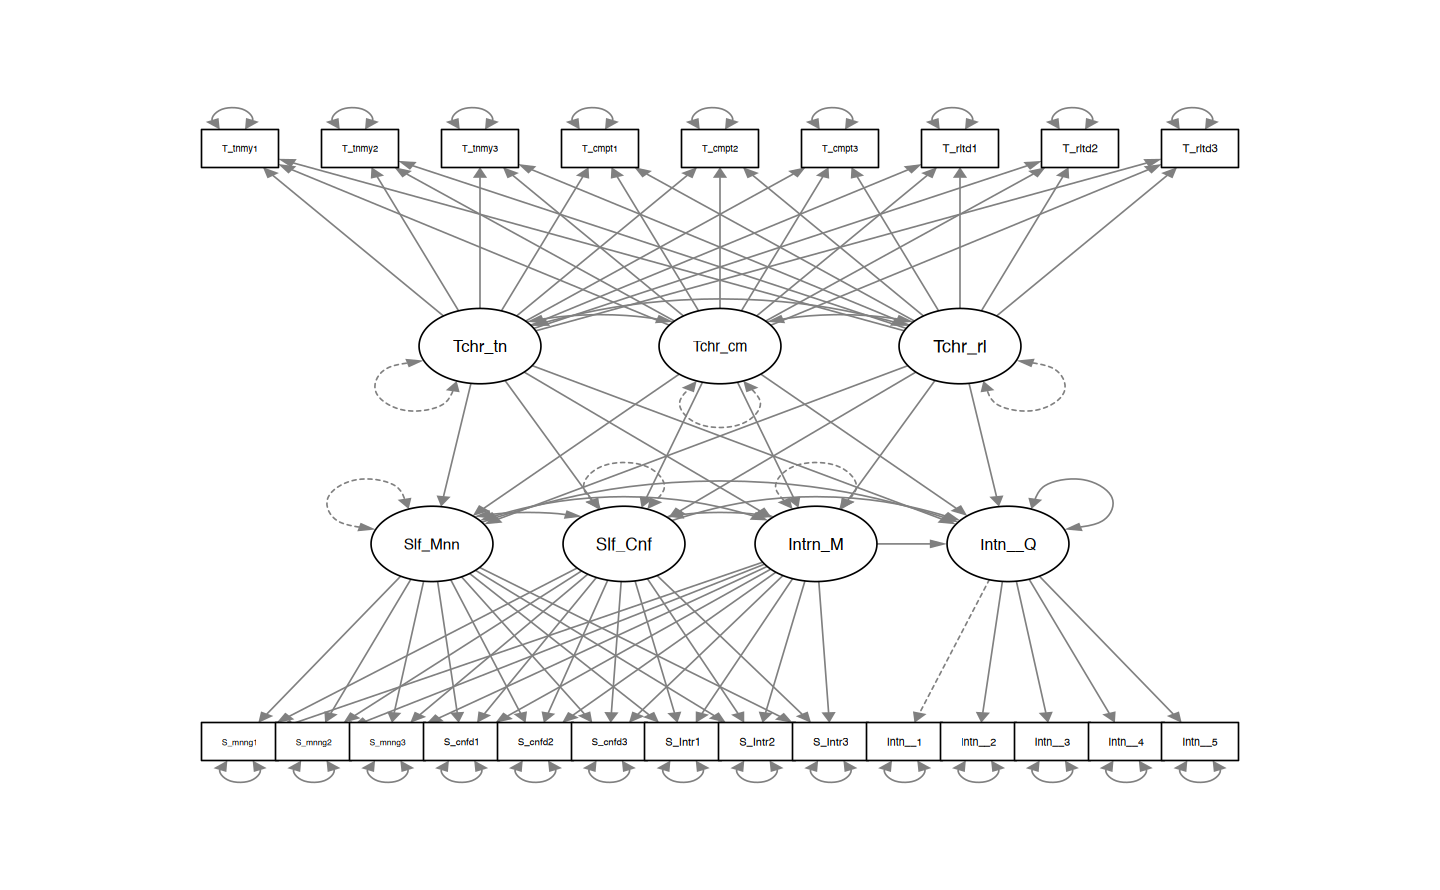

In [8]:
semPlot::semPaths(
    out1,
    what = "col", whatLabels = "no", style = "mx",
    layout = "tree", nCharNodes = 7,
    shapeMan = "rectangle", sizeMan = 5, sizeMan2 = 4
)

In [9]:
summary(out1, standardized = TRUE, fit.measures = TRUE) |> print()

lavaan 0.6-19 ended normally after 67 iterations

  Estimator                                         ML
  Optimization method                           NLMINB
  Number of model parameters                       103
  Row rank of the constraints matrix                12

  Rotation method                       GEOMIN OBLIQUE
  Geomin epsilon                                 0.005
  Rotation algorithm (rstarts)                GPA (30)
  Standardized metric                             TRUE
  Row weights                                     None

  Number of observations                           269

Model Test User Model:
                                              Standard      Scaled
  Test Statistic                               396.932     367.121
  Degrees of freedom                               185         185
  P-value (Chi-square)                           0.000       0.000
  Scaling correction factor                                  1.081
    Yuan-Bentler correction (Mplus vari

In [10]:
cfa1 <- ' ## Specify the measurement model

  # "teacher" factors
  Teacher_autonomy    =~    T_autonomy1 +    T_autonomy2 +    T_autonomy3
  Teacher_competence  =~  T_competence1 +  T_competence2 +  T_competence3
  Teacher_relatedness =~ T_relatedness1 + T_relatedness2 + T_relatedness3

  # "self" factors
  Self_Meaning         =~    S_meaning1 +    S_meaning2 +    S_meaning3
  Self_Confidence      =~ S_confidence1 + S_confidence2 + S_confidence3
  Intrinsic_Motivation =~  S_Intrinsic1 +  S_Intrinsic2 +  S_Intrinsic3

  # defining the outcome variable
  Intent_to_Quit =~ Intent_to_withdraw1 + Intent_to_withdraw2 + Intent_to_withdraw3 + Intent_to_withdraw4 + Intent_to_withdraw5

  # specify the structural model
  Self_Meaning ~ Teacher_autonomy + Teacher_competence + Teacher_relatedness
  Self_Confidence ~ Teacher_autonomy + Teacher_competence + Teacher_relatedness
  Intrinsic_Motivation ~ Teacher_autonomy + Teacher_competence + Teacher_relatedness
  Intent_to_Quit ~ Self_Meaning + Self_Confidence + Intrinsic_Motivation +
                   Teacher_autonomy + Teacher_competence + Teacher_relatedness

  # residual covariances among mediating factors in Block 2 ("self")
  # (not automatically estimated due to being predictors as well,
  #  but ESEM rotation allows their covariances to be nonzero)
  Self_Meaning    ~~ Self_Confidence + Intrinsic_Motivation
  Self_Confidence ~~ Intrinsic_Motivation
'

In [12]:
fit1 <- sem(
    model = cfa1, data = study1_dat,
    estimator = "MLR", std.lv = TRUE
)

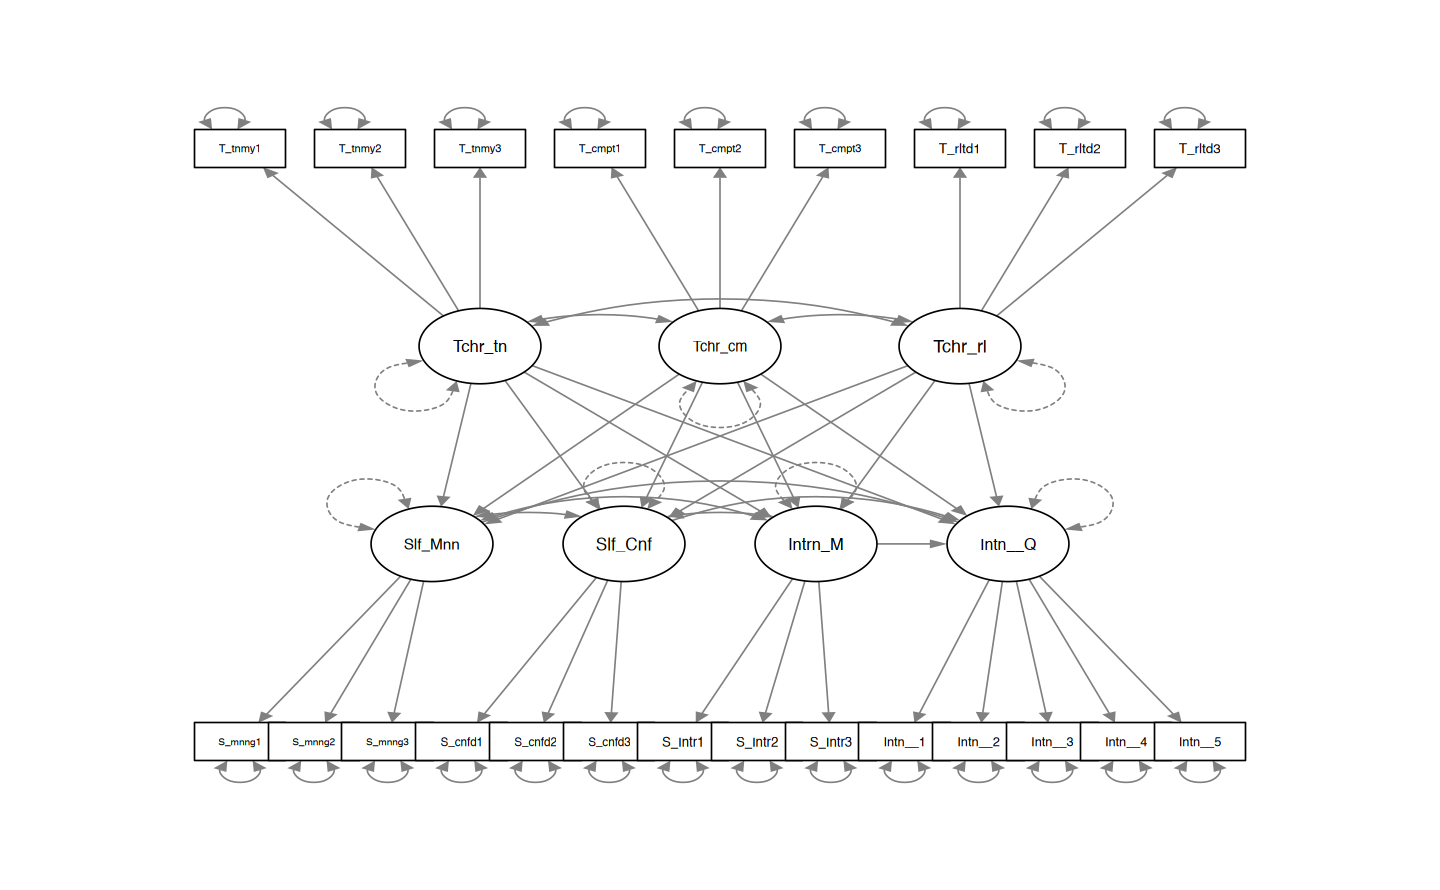

In [15]:
semPlot::semPaths(
    fit1,
    what = "col", whatLabels = "no", style = "mx",
    layout = "tree", nCharNodes = 7,
    shapeMan = "rectangle", sizeMan = 6, sizeMan2 = 4
)

In [16]:
summary(fit1, standardized = TRUE, fit.measures = TRUE) |> print()

lavaan 0.6-19 ended normally after 53 iterations

  Estimator                                         ML
  Optimization method                           NLMINB
  Number of model parameters                        67

  Number of observations                           269

Model Test User Model:
                                              Standard      Scaled
  Test Statistic                               459.107     419.040
  Degrees of freedom                               209         209
  P-value (Chi-square)                           0.000       0.000
  Scaling correction factor                                  1.096
    Yuan-Bentler correction (Mplus variant)                       

Model Test Baseline Model:

  Test statistic                              4271.294    3518.139
  Degrees of freedom                               253         253
  P-value                                        0.000       0.000
  Scaling correction factor                                  1.214

User 

In [ ]:
# Extract model fit statistics from out1 and fit1
fit_stats_out1 <- fitMeasures(out1, c("chisq", "df", "rmsea", "rmsea.ci.lower", "rmsea.ci.upper", "cfi", "tli"))
fit_stats_fit1 <- fitMeasures(fit1, c("chisq", "df", "rmsea", "rmsea.ci.lower", "rmsea.ci.upper", "cfi", "tli"))

# Create a tibble with the extracted fit statistics
fit_table <- tibble(
    Model = c("CFA-based model", "Set-ESEM-based model"),
    chisq = c(fit_stats_fit1["chisq"], fit_stats_out1["chisq"]),
    df = c(fit_stats_fit1["df"], fit_stats_out1["df"]),
    RMSEA = c(fit_stats_fit1["rmsea"], fit_stats_out1["rmsea"]),
    `RMSEA 90% CI` = c(
        sprintf("(%.3f, %.3f)", fit_stats_fit1["rmsea.ci.lower"], fit_stats_fit1["rmsea.ci.upper"]),
        sprintf("(%.3f, %.3f)", fit_stats_out1["rmsea.ci.lower"], fit_stats_out1["rmsea.ci.upper"])
    ),
    CFI = c(fit_stats_fit1["cfi"], fit_stats_out1["cfi"]),
    TLI = c(fit_stats_fit1["tli"], fit_stats_out1["tli"])
)

# Convert numeric columns to formatted strings with three decimal places
fit_table <- fit_table %>%
    mutate(
        across(where(is.numeric), ~ sprintf("%.3f", .)),
        chisq = sprintf("%.3f", as.numeric(chisq)), # Ensure chisq is formatted correctly
        df = as.character(df) # Convert df to character for consistent formatting
    )

# Calculate column widths for alignment
col_widths <- fit_table %>%
    summarise(across(everything(), ~ max(nchar(.), na.rm = TRUE)))

# Create text-based table output
header <- paste(
    str_pad("Model", col_widths$Model, side = "right"),
    str_pad("chisq", col_widths$chisq, side = "right"),
    str_pad("df", col_widths$df, side = "right"),
    str_pad("RMSEA", col_widths$RMSEA, side = "right"),
    str_pad("RMSEA 90% CI", col_widths$`RMSEA 90% CI`, side = "right"),
    str_pad("CFI", col_widths$CFI, side = "right"),
    str_pad("TLI", col_widths$TLI, side = "right"),
    sep = " | "
)
separator <- strrep("-", nchar(header))

# Print header and separator
cat(header, "\n")
cat(separator, "\n")

# Print each row formatted with aligned columns
fit_table %>%
    mutate(
        Model = str_pad(Model, col_widths$Model, side = "right"),
        chisq = str_pad(chisq, col_widths$chisq, side = "right"),
        df = str_pad(df, col_widths$df, side = "right"),
        RMSEA = str_pad(RMSEA, col_widths$RMSEA, side = "right"),
        `RMSEA 90% CI` = str_pad(`RMSEA 90% CI`, col_widths$`RMSEA 90% CI`, side = "right"),
        CFI = str_pad(CFI, col_widths$CFI, side = "right"),
        TLI = str_pad(TLI, col_widths$TLI, side = "right")
    ) %>%
    rowwise() %>%
    mutate(row_text = paste(Model, chisq, df, RMSEA, `RMSEA 90% CI`, CFI, TLI, sep = " | ")) %>%
    pull(row_text) %>%
    cat(sep = "\n")


Model                | chisq   | df      | RMSEA | RMSEA 90% CI   | CFI   | TLI   
--------------------------------------------------------------------------------- 
CFA-based model      | 459.107 | 209.000 | 0.067 | (0.058, 0.075) | 0.938 | 0.925
Set-ESEM-based model | 396.932 | 185.000 | 0.065 | (0.056, 0.074) | 0.947 | 0.928


Per stimare i modelli, @marsh2024and utilizzano la versione robusta della massima verosimiglianza (MLR). Per valutare la qualità dei modelli, @marsh2024and considerano il chi-quadro robusto (χ²) con i relativi gradi di libertà e valore p (Yuan & Bentler, 2000), oltre che il Comparative Fit Index (CFI), il TLI e il RMSEA con il suo intervallo di confidenza al 90%. I valori di CFI, TLI e RMSEA riportati nei due esempi sono quelli nella versione robusta. 

I risultati in Tabella precedente indicano che sia il modello strutturale basato su CFA che quello basato su set-ESEM hanno un buon adattamento ai dati. Nel loro tutorial, @marsh2024and si focalizziano sulle differenze nelle relazioni strutturali tra i due modelli, e non approfondiscono il modello di misura. 

La Tabella 2 dell'articolo di @marsh2024and mostra i coefficienti di percorso per entrambi i modelli. Sebbene entrambi i modelli mostrino un adattamento accettabile, il modello strutturale set-ESEM si adatta meglio ai dati (+0.01 in TLI/CFI). Inoltre, l’Akaike Information Criterion (AIC), il BIC e il BIC corretto per la dimensione del campione nel modello CFA sono rispettivamente 15985.43, 16226.27 e 16013.84, mentre nel modello ESEM sono 15971.25, 16298.37 e 16009.84. I valori più bassi di AIC e BIC corretti per campione nel modello ESEM indicano un miglior adattamento rispetto al modello CFA. 

Inoltre, le correlazioni tra le variabili latenti esogene tendono a essere sovrastimate nel modello CFA (Shao et al., 2022). Ad esempio, la correlazione tra Autonomia_Insegnante e Relazionalità_Insegnante è di .80 nel modello CFA ma di .51 nel modello set-ESEM (Δr = .29). Ciò può influenzare la stima dei parametri a causa della collinearità derivante da una specificazione non ottimale del modello di misura. 

Alcuni percorsi diventano significativi nel modello set-ESEM, come il percorso Competenza_Insegnante → Motivazione_Intrinseca, che non è significativo nel CFA (β = .08, p = .51) ma diventa significativo nel set-ESEM (β = .19, p = .03). Un’altra osservazione riguarda il percorso Relazionalità_Insegnante → Intenzione_di_Ritiro, non significativo nel modello CFA (β = −.20, p = .18) ma significativo nel set-ESEM (β = −.28, p = .01). 

In sintesi, ciascun modello può portare a conclusioni diverse sulle relazioni tra variabili latenti. Dato che il set-ESEM si adatta meglio ai dati, i coefficienti di percorso ottenuti possono essere interpretati come più affidabili rispetto al modello CFA.

## Studio 2: Utilizzo del set-ESEM per valutare modelli longitudinali

Lo Studio 2 di @marsh2024and illustra un secondo scenario, in cui il ricercatore dispone di costrutti raccolti in momenti temporali differenti. In questo esempio, sono stati misurati tre costrutti in due tempi diversi. I primi due costrutti, autonomia e motivazione intrinseca, sono stati descritti nello Studio 1 e derivano dalla teoria dell’autodeterminazione (Ryan & Deci, 2017). Il terzo costrutto è l’autoefficacia, che riflette la convinzione degli studenti circa la propria capacità di ottenere risultati desiderati e prevenire quelli dannosi (Woodrow, 2006). La ricerca suggerisce che questi tre fattori (autonomia, motivazione intrinseca e autoefficacia) agiscono collettivamente come motivazioni parallele che favoriscono risultati positivi (Alamer et al., 2023; Noels, 2023; Ryan & Deci, 2017).

Un modello che stima i costrutti al tempo 1 per prevedere i corrispondenti al tempo 2 (controllando la stabilità della misura nel tempo) e che valuta anche il loro effetto sulla variabile di esito può essere meglio analizzato con il set-ESEM piuttosto che con il full-ESEM (Marsh et al., 2020). Nei modelli longitudinali SEM, è spesso necessario correlare le unicità dello stesso item nel tempo (Marsh & Hau, 1996). Inoltre, il ricercatore può voler applicare l’invarianza di misura per garantire la stabilità della misura nel tempo, imponendo vincoli di uguaglianza longitudinale sui carichi fattoriali, possibile con il codice in formato long per il set-ESEM in lavaan.

Ecco un esempio di vincoli di uguaglianza sui quattro item di self-confidence nei due tempi. Le etichette a*, b*, c* e d* indicano vincoli di uguaglianza sui carichi primari: lo stesso item ha la stessa etichetta nei due tempi. Parametri con la stessa etichetta sono stimati come uguali. Seguendo la prassi CFA per l’invarianza di misura, bisogna impostare la scala latente per un gruppo di riferimento o occasione (qui, il tempo 1), lasciando liberi i restanti. Il valore mancante, NA*, libera la varianza del fattore al tempo 2. In lavaan, per preservare i vincoli di uguaglianza tra blocchi in una soluzione ruotata, è necessario equare tutti i carichi, affinché il blocco del tempo 2 rispecchi quello del tempo 1. Sebbene vincoli di parziale invarianza siano più realistici, essi non sarebbero mantenuti in una soluzione ruotata.

Ecco un esempio di sintassi per gli item di self-confidence:

```R
efa("time1")*SelfConfidenceT1 =~ a*SelfConf1T1 + b*SelfConf2T1 +
c*SelfConf3T1 + d*SelfConf4T1 + e*Intr1T1 + f*Intr2T1 + g*Intr3T1 +
h*Auton1T1 + i*Auton2T1 + j*Auton3T1 + k*Auton4T1
efa("time2")*SelfConfidenceT2 =~ a*SelfConf1T2 + b*SelfConf2T2 +
c*SelfConf3T2 + d*SelfConf4T2 + e*Intr1T2 + f*Intr2T2 + g*Intr3T2 +
h*Auton1T2 + i*Auton2T2 + j*Auton3T2 + k*Auton4T2
## liberazione della varianza del fattore al Tempo 2
SelfConfidenceT2 ~~ NA*SelfConfidenceT2
```

L’utilizzo dell’invarianza di misura nel set-ESEM permette di ridurre la soluzione a un singolo blocco ESEM, più parsimonioso e spesso vantaggioso per l’analisi longitudinale. Tuttavia, per mantenere il focus sulle applicazioni standard del CFA e del set-ESEM, riportiamo solo gli indici di adattamento dei modelli con invarianza di misura senza discutere i coefficienti di percorso. Forniamo comunque la sintassi R nel repository OSF per consentire ai lettori di riprodurre i risultati completi.

Per testare un modello longitudinale set-ESEM, @marsh2024and stimano solo i cross-loading tra i fattori nello stesso tempo. Ad esempio, gli item del tempo 1 per autonomia, motivazione intrinseca e autoefficacia hanno cross-loading sui fattori del tempo 1, ma non su quelli del tempo 2. Allo stesso modo, gli item del tempo 2 hanno cross-loading sui fattori del tempo 2, ma non su quelli del tempo 1. Si noti che le correlazioni tra le unicità dello stesso item nei due tempi sono stimate ma non visualizzate in figura per semplicità (solo un esempio di correlazione tra unicità è mostrato tra Aut1 e Aut1T2).

**Misure**

Per valutare l'autonomia, sono stati utilizzati quattro item della scala BPN-L2 già descritta in precedenza. Un esempio di item è stato presentato nello Studio 1. La motivazione intrinseca è stata misurata con tre item della scala SDT-L2 (Alamer, 2022). La self-confidence (fiducia in sé stessi) è stata valutata tramite quattro item adottati da Dörnyei e Ushioda (2021; vedi anche Dörnyei & Ryan, 2015), come descritto nello Studio 1. Le misurazioni si basano su una scala Likert a cinque punti, con risposte da 1 (fortemente in disaccordo) a 5 (fortemente d'accordo).

Il livello di competenza linguistica è stato misurato tramite un test di collocamento in inglese come seconda lingua. Il test include item sulle quattro abilità principali: vocabolario, grammatica, lettura e scrittura. È stato sviluppato consultando il corso di lingua Unlock, ideato dall'Università di Cambridge (Ostrowska et al., 2021). Sebbene il formato del test possa variare, consiste principalmente in domande a scelta multipla e in esercizi di completamento. Un campione simulato è incluso nel repository OSF. Il punteggio totale del test va da 0 a 20, con una media di 14.2 e una deviazione standard di 4.7.

::: {#fig-esem-study2}
![](../../figures/esem_study2.png){width="90%"}
Un modello longitudinale basato su CFA (modello A) e un modello longitudinale set-ESEM (modello B).  Nota: le linee tratteggiate indicano i carichi incrociati non target. [Figura tratta da @marsh2024and]
:::

In [38]:
study2_dat <- rio::import(
    here::here(
        "data", "marsh_alamer", "Study_2_data.csv"
    )
)

In [51]:
esem2_config <- '

  # The measurement model
  # WITHOUT equality constraints on factor loadings

  # Time 1 Set-ESEM
  efa("time1")*SelfConfidenceT1 =~ SelfConf1T1 + SelfConf2T1 + SelfConf3T1 + SelfConf4T1 + Intr1T1 + Intr2T1 + Intr3T1 + Auton1T1 + Auton2T1 + Auton3T1 + Auton4T1
  efa("time1")*IntrinsicT1 =~ SelfConf1T1 + SelfConf2T1 + SelfConf3T1 + SelfConf4T1 + Intr1T1 + Intr2T1 + Intr3T1 + Auton1T1 + Auton2T1 + Auton3T1 + Auton4T1
  efa("time1")*AutonomyT1 =~ SelfConf1T1 + SelfConf2T1 + SelfConf3T1 + SelfConf4T1 + Intr1T1 + Intr2T1 + Intr3T1 + Auton1T1 + Auton2T1 + Auton3T1 + Auton4T1

  # Time 2 Set-ESEM
  efa("time2")*SelfConfidenceT2 =~ SelfConf1T2 + SelfConf2T2 + SelfConf3T2 + SelfConf4T2 + Intr1T2 + Intr2T2 + Intr3T2 + Auton1T2 + Auton2T2 + Auton3T2 + Auton4T2
  efa("time2")*IntrinsicT2 =~ SelfConf1T2 + SelfConf2T2 + SelfConf3T2 + SelfConf4T2 + Intr1T2 + Intr2T2 + Intr3T2 + Auton1T2 + Auton2T2 + Auton3T2 + Auton4T2
  efa("time2")*AutonomyT2 =~ SelfConf1T2 + SelfConf2T2 + SelfConf3T2 + SelfConf4T2 + Intr1T2 + Intr2T2 + Intr3T2 + Auton1T2 + Auton2T2 + Auton3T2 + Auton4T2

  # The structural model
  SelfConfidenceT2 ~ SelfConfidenceT1
  IntrinsicT2 ~ IntrinsicT1
  AutonomyT2 ~ AutonomyT1
  L2_achievement ~ SelfConfidenceT1 + IntrinsicT1 + AutonomyT1 + SelfConfidenceT2 + IntrinsicT2 + AutonomyT2

  # Residual correlations
  SelfConf1T2 ~~ SelfConf1T1
  SelfConf2T2 ~~ SelfConf2T1
  SelfConf3T2 ~~ SelfConf3T1
  SelfConf4T2 ~~SelfConf4T1

  Auton1T2 ~~ Auton1T1
  Auton2T2 ~~ Auton2T1
  Auton3T2 ~~ Auton3T1
  Auton4T2 ~~ Auton4T1

  Intr1T2 ~~ Intr1T1
  Intr2T2 ~~ Intr2T1
  Intr3T2 ~~ Intr3T1
'

In [52]:
out2_config <- sem(
    model = esem2_config,
    data = study2_dat,
    estimator = "MLR", # verbose = TRUE,
    rotation = "geomin",
    rotation.args = list(geomin.epsilon = 0.005)
)

In [53]:
esem2_metric <- '

  # The measurement model
  # WITH equality constraints on factor loadings

  # Time 1 Set-ESEM
  efa("time1")*SelfConfidenceT1 =~ a*SelfConf1T1 + b*SelfConf2T1 + c*SelfConf3T1 + d*SelfConf4T1 + e*Intr1T1 + f*Intr2T1 + g*Intr3T1 + h*Auton1T1 + i*Auton2T1 + j*Auton3T1 + k*Auton4T1
  efa("time1")*IntrinsicT1 =~ aa*SelfConf1T1 + bb*SelfConf2T1 + cc*SelfConf3T1 + dd*SelfConf4T1 + ee*Intr1T1 + ff*Intr2T1 + gg*Intr3T1 + hh*Auton1T1 + ii*Auton2T1 + jj*Auton3T1 + kk*Auton4T1
  efa("time1")*AutonomyT1 =~ aaa*SelfConf1T1 + bbb*SelfConf2T1 + ccc*SelfConf3T1 + ddd*SelfConf4T1 + eee*Intr1T1 + fff*Intr2T1 + ggg*Intr3T1 + hhh*Auton1T1 + iii*Auton2T1 + jjj*Auton3T1 + kkk*Auton4T1

  # Time 2 Set-ESEM
  efa("time2")*SelfConfidenceT2 =~ a*SelfConf1T2 + b*SelfConf2T2 + c*SelfConf3T2 + d*SelfConf4T2 + e*Intr1T2 + f*Intr2T2 + g*Intr3T2 + h*Auton1T2 + i*Auton2T2 + j*Auton3T2 + k*Auton4T2
  efa("time2")*IntrinsicT2 =~ aa*SelfConf1T2 + bb*SelfConf2T2 + cc*SelfConf3T2 + dd*SelfConf4T2 + ee*Intr1T2 + ff*Intr2T2 + gg*Intr3T2 + hh*Auton1T2 + ii*Auton2T2 + jj*Auton3T2 + kk*Auton4T2
  efa("time2")*AutonomyT2 =~ aaa*SelfConf1T2 + bbb*SelfConf2T2 + ccc*SelfConf3T2 + ddd*SelfConf4T2 + eee*Intr1T2 + fff*Intr2T2 + ggg*Intr3T2 + hhh*Auton1T2 + iii*Auton2T2 + jjj*Auton3T2 + kkk*Auton4T2

  # Free factors variances at Time 2
  SelfConfidenceT2 ~~ NA*SelfConfidenceT2
  IntrinsicT2 ~~ NA*IntrinsicT2
  AutonomyT2 ~~ NA*AutonomyT2

  # The structural model
  SelfConfidenceT2 ~ SelfConfidenceT1
  IntrinsicT2 ~ IntrinsicT1
  AutonomyT2 ~ AutonomyT1
  L2_achievement ~ SelfConfidenceT1 + IntrinsicT1 + AutonomyT1 + SelfConfidenceT2 + IntrinsicT2 + AutonomyT2

  # Residual correlations
  SelfConf1T2 ~~ SelfConf1T1
  SelfConf2T2 ~~ SelfConf2T1
  SelfConf3T2 ~~ SelfConf3T1
  SelfConf4T2 ~~SelfConf4T1

  Auton1T2 ~~ Auton1T1
  Auton2T2 ~~ Auton2T1
  Auton3T2 ~~ Auton3T1
  Auton4T2 ~~ Auton4T1

  Intr1T2 ~~ Intr1T1
  Intr2T2 ~~ Intr2T1
  Intr3T2 ~~ Intr3T1

'

In [54]:
out2_metric <- sem(
    model = esem2_metric, data = study2_dat,
    estimator = "MLR", # verbose = TRUE,
    rotation = "geomin", rotation.args = list(geomin.epsilon = 0.005)
)

In [55]:
lavTestLRT(out2_config, out2_metric)

,Df,AIC,BIC,Chisq,Chisq diff,Df diff,Pr(>Chisq)
,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>
out2_config,173,23779.97,24191.6,310.5786,NA,NA,NA
out2_metric,197,23767.68,24083.4,346.2858,31.43027,24,0.1417601


@marsh2024and considerano anche i corrispondenti modelli CFA, senza invarianza di misurazione e con invarianza di misurazione.

In [ ]:
cfa2_config <- "

  # The measurement model
  # WITHOUT equality constraints on factor loadings

  # Time 1 Set-ESEM
  SelfConfidenceT1 =~ SelfConf1T1 + SelfConf2T1 + SelfConf3T1 + SelfConf4T1
  IntrinsicT1      =~     Intr1T1 +     Intr2T1 +     Intr3T1
  AutonomyT1       =~    Auton1T1 +    Auton2T1 +    Auton3T1 +    Auton4T1

  # Time 2 Set-ESEM
  SelfConfidenceT2 =~ SelfConf1T2 + SelfConf2T2 + SelfConf3T2 + SelfConf4T2
  IntrinsicT2      =~     Intr1T2 +     Intr2T2 +     Intr3T2
  AutonomyT2       =~    Auton1T2 +    Auton2T2 +    Auton3T2 +    Auton4T2

  ## The structural model
  SelfConfidenceT2 ~ SelfConfidenceT1
  IntrinsicT2 ~ IntrinsicT1
  AutonomyT2 ~ AutonomyT1
  L2_achievement ~ SelfConfidenceT1 + IntrinsicT1 + AutonomyT1 + SelfConfidenceT2 + IntrinsicT2 + AutonomyT2

  # Residual correlations
  SelfConf1T2 ~~ SelfConf1T1
  SelfConf2T2 ~~ SelfConf2T1
  SelfConf3T2 ~~ SelfConf3T1
  SelfConf4T2 ~~SelfConf4T1

  Auton1T2 ~~ Auton1T1
  Auton2T2 ~~ Auton2T1
  Auton3T2 ~~ Auton3T1
  Auton4T2 ~~ Auton4T1

  Intr1T2 ~~ Intr1T1
  Intr2T2 ~~ Intr2T1
  Intr3T2 ~~ Intr3T1

  # Residual correlations among Time-2 factors
  # (not automatically estimated due to being predictors as well,
  #  but ESEM rotation allows their covariances to be nonzero)
  SelfConfidenceT2 ~~ IntrinsicT2 + AutonomyT2
  IntrinsicT2      ~~ AutonomyT2

"

In [ ]:
fit2_config <- sem(
    model = cfa2_config,
    data = study2_dat,
    estimator = "MLR",
    std.lv = TRUE
)

In [ ]:
cfa2_metric <- "

  # The measurement model
  # WITHOUT equality constraints on factor loadings

  # Time 1 Set-ESEM
  SelfConfidenceT1 =~ a*SelfConf1T1 + b*SelfConf2T1 + c*SelfConf3T1 + d*SelfConf4T1
  IntrinsicT1      =~     e*Intr1T1 +     f*Intr2T1 +     g*Intr3T1
  AutonomyT1       =~    h*Auton1T1 +    i*Auton2T1 +    j*Auton3T1 +    k*Auton4T1

  # Time 2 Set-ESEM
  SelfConfidenceT2 =~ a*SelfConf1T2 + b*SelfConf2T2 + c*SelfConf3T2 + d*SelfConf4T2
  IntrinsicT2      =~     e*Intr1T2 +     f*Intr2T2 +     g*Intr3T2
  AutonomyT2       =~    h*Auton1T2 +    i*Auton2T2 +    j*Auton3T2 +    k*Auton4T2

  # Free factors variances at Time 2
  SelfConfidenceT2 ~~ NA*SelfConfidenceT2
  IntrinsicT2 ~~ NA*IntrinsicT2
  AutonomyT2 ~~ NA*AutonomyT2

  # The structural model
  SelfConfidenceT2 ~ SelfConfidenceT1
  IntrinsicT2 ~ IntrinsicT1
  AutonomyT2 ~ AutonomyT1
  L2_achievement ~ SelfConfidenceT1 + IntrinsicT1 + AutonomyT1 + SelfConfidenceT2 + IntrinsicT2 + AutonomyT2

  # Residual correlations
  SelfConf1T2 ~~ SelfConf1T1
  SelfConf2T2 ~~ SelfConf2T1
  SelfConf3T2 ~~ SelfConf3T1
  SelfConf4T2 ~~SelfConf4T1

  Auton1T2 ~~ Auton1T1
  Auton2T2 ~~ Auton2T1
  Auton3T2 ~~ Auton3T1
  Auton4T2 ~~ Auton4T1

  Intr1T2 ~~ Intr1T1
  Intr2T2 ~~ Intr2T1
  Intr3T2 ~~ Intr3T1

  # Residual correlations among Time-2 factors
  # (not automatically estimated due to being predictors as well,
  #  but ESEM rotation allows their covariances to be nonzero)
  SelfConfidenceT2 ~~ IntrinsicT2 + AutonomyT2
  IntrinsicT2      ~~ AutonomyT2

"

In [ ]:
fit2_metric <- sem(
    model = cfa2_metric,
    data = study2_dat,
    estimator = "MLR",
    std.lv = TRUE
)

In [49]:
lavTestLRT(fit2_config, fit2_metric)

,Df,AIC,BIC,Chisq,Chisq diff,Df diff,Pr(>Chisq)
,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>
fit2_config,205,23790.88,24074.63,385.4927,NA,NA,NA
fit2_metric,213,23782.68,24034.45,393.2852,7.126655,8,0.5230313


In [50]:
summary(fit2_metric, standardized = TRUE, fit.measures = TRUE) |> print()

lavaan 0.6-19 ended normally after 46 iterations

  Estimator                                         ML
  Optimization method                           NLMINB
  Number of model parameters                        74
  Number of equality constraints                    11

  Number of observations                           402

Model Test User Model:
                                              Standard      Scaled
  Test Statistic                               393.285     353.480
  Degrees of freedom                               213         213
  P-value (Chi-square)                           0.000       0.000
  Scaling correction factor                                  1.113
    Yuan-Bentler correction (Mplus variant)                       

Model Test Baseline Model:

  Test statistic                              3534.015    2982.265
  Degrees of freedom                               253         253
  P-value                                        0.000       0.000
  Scaling correcti

**Risultati**

**Stima dei modelli strutturali set-ESEM e CFA**

@marsh2024and stimano i modelli strutturali basati su set-ESEM e CFA usando l'MLR. I risultati dei due modelli sono riportati nella Tabella 3 e indicano che entrambi offrono un buon adattamento ai dati. Si noti che questi risultati si riferiscono ai modelli con invarianza metrica, poiché essi hanno mostrato un adattamento simile ai modelli configurali. Tuttavia, il modello set-ESEM ha mostrato un adattamento migliore ai dati (ΔTLI/CFI = +.01). Gli indici AIC, BIC e BIC corretto per la dimensione del campione per il modello CFA sono rispettivamente 23,782.68, 24,034.45 e 23,834.55, mentre per il modello ESEM sono 23,764.25, 24,067.98 e 23,826.82. Valori più bassi di AIC e BIC corretto nel modello ESEM indicano un adattamento migliore di questo modello.

Come mostrato nella Tabella 4, le correlazioni tra i fattori esogeni sono notevolmente più basse nel modello strutturale set-ESEM rispetto al modello CFA. Ad esempio, la correlazione tra Self_Confidence_T1 e Autonomy_T1 è 0.55 nel modello CFA, ma solo 0.29 nel modello set-ESEM (Δr = .26). Questi valori di correlazione più bassi influenzano la predizione degli effetti nel modello strutturale, come spiegato di seguito. In particolare, alcuni coefficienti di percorso differiscono in dimensione e valore di p tra i due modelli.

**TABELLA 3: Indici di adattamento per i modelli longitudinali CFA e set-ESEM**
\*Significativo a p < .01.

| Modello                           | χ²     | df  | RMSEA | Intervallo di confidenza RMSEA (90%) | CFI   | TLI   |
|-----------------------------------|--------|-----|-------|--------------------------------------|-------|-------|
| Modello basato su CFA             | 346.24\* | 205 | .044  | (.036, .052)                        | .951  | .940  |
| Modello CFA con invarianza metrica| 353.48\* | 213 | .043  | (.035, .050)                        | .952  | .943  |
| Modello basato su set-ESEM        | 283.98\* | 173 | .042  | (.033, .050)                        | .962  | .945  |
| Modello set-ESEM con invarianza   | 314.93\* | 200 | .040  | (.031, .048)                        | .961  | .950  |

**TABELLA 4: Coefficienti di percorso nei due modelli con invarianza metrica**

| Variabile dipendente    | Predittore              | Risultati CFA       | Risultati set-ESEM    |
|-------------------------|-------------------------|---------------------|------------------------|
| Self_Confidence_T2      | Self_Confidence_T1      | .66 (p < .01)       | .66 (p < .01)          |
| Intrinsic_T2            | Intrinsic_T1            | .61 (p < .01)       | .55 (p < .01)          |
| Autonomy_T2             | Autonomy_T1             | .45 (p < .01)       | .42 (p < .01)          |
| L2_achievement          | Self_Confidence_T1      | .30 (p < .01)       | .27 (p < .01)          |
| L2_achievement          | Intrinsic_T1            | .10 (p = .07)       | .14 (p < .01)          |
| L2_achievement          | Autonomy_T1             | .11 (p = .05)       | .16 (p < .01)          |
| L2_achievement          | Self_Confidence_T2      | .39 (p < .01)       | .40 (p < .01)          |
| L2_achievement          | Intrinsic_T2            | .08 (p = .09)       | .12 (p = .01)          |
| L2_achievement          | Autonomy_T2             | .23 (p < .01)       | .26 (p < .01)          |

Le correlazioni tra fattori mostrano differenze sostanziali nei due modelli, con valori inferiori per il set-ESEM. Ad esempio, nel modello CFA, la correlazione tra Self_Confidence_T1 e Autonomy_T1 è 0.55 (p < .01), mentre nel modello set-ESEM è 0.29 (p < .01).

Alcuni coefficienti di percorso mostrano anche risultati differenti tra i modelli CFA e set-ESEM. Ad esempio, il modello CFA indica che la motivazione intrinseca al tempo 1 e al tempo 2 non è significativa come predittore del successo linguistico (e.g., Intrinsic_T1 → L2_achievement, β = .10, p = .07 e Intrinsic_T2 → L2_achievement, β = .08, p = .09), mentre nel modello set-ESEM questi effetti risultano significativi (Intrinsic_T1 → L2_achievement, β = .14, p < .01, e Intrinsic_T2 → L2_achievement, β = .12, p = .01). La significatività di questi coefficienti di percorso nel modello set-ESEM, ma non nel CFA, porta a conclusioni diverse sugli effetti predittivi delle variabili.

## Riflessioni Conclusive

In questo tutorial, @marsh2024and introducono l’ESEM, focalizzandosi in particolare sul set-ESEM. Sebbene il set-ESEM sia generalmente utilizzato per la valutazione dei modelli di misurazione, gli autori approfondiscono la sua applicazione nei modelli strutturali. In particolare, esplorano le ragioni concettuali che giustificano il ricorso al set-ESEM rispetto al modello CFA e all’ESEM completamente rilassato. Il set-ESEM rappresenta un compromesso tra l’ESEM completo e il CFA, consentendo di specificare “mini-set” indipendenti di ESEM in un’unica soluzione (Marsh et al., 2020). In alcuni casi, l’ESEM completamente rilassato può risultare non necessario, inappropriato o tecnicamente impraticabile. Gli autori illustrano due esempi in cui il set-ESEM risulta preferibile rispetto all’ESEM completo, confrontandone i risultati con quelli del CFA.

Gli esempi presentati suggeriscono che il set-ESEM offre una rappresentazione più utile dei dati rispetto al CFA. Sebbene i modelli CFA sembrino adattarsi ai dati, le correlazioni tra i fattori esogeni nei modelli CFA risultano sistematicamente più elevate, sia nello Studio 1 che nello Studio 2. Tali alte correlazioni possono influenzare negativamente i coefficienti di percorso nel modello strutturale a causa di una possibile multicollinearità (Mai et al., 2018; Morin, 2023). 

Nello Studio 1, i coefficienti di percorso differiscono significativamente tra i modelli strutturali basati su CFA e quelli basati su set-ESEM, portando a conclusioni differenti sugli effetti tra le variabili. Ad esempio, l’effetto della percezione dell’insegnante come promotore di competenza sulla motivazione intrinseca degli studenti risulta non significativo nel modello CFA, ma significativo nel modello set-ESEM. Inoltre, il CFA suggerisce che percepire l’insegnante come promotore di relazionalità non ha un impatto rilevante sull’intenzione degli studenti di abbandonare lo studio della lingua, mentre il modello set-ESEM rileva un effetto significativo e negativo. Solo il modello set-ESEM evidenzia quindi l’importante ruolo degli insegnanti nel sostenere la perseveranza degli studenti (Alamer & Al Khateeb, 2023; Alamer, Al Khateeb, & Jeno, 2023; Noels, 2023).

Nello Studio 2, i coefficienti di percorso mostrano variazioni analoghe tra i modelli CFA e set-ESEM, con differenze nelle conclusioni sulle relazioni longitudinali. Ad esempio, il modello strutturale CFA suggerisce che la motivazione intrinseca al tempo 1 e al tempo 2 ha poca rilevanza predittiva per il successo linguistico futuro, una conclusione che contrasta con l’importanza attribuita alla motivazione intrinseca nella letteratura (Alamer, 2022; Alamer & Alrabai, 2023; Horwood et al., 2021).

In sintesi, i due esempi empirici mostrano come i coefficienti di percorso siano significativi nel modello set-ESEM, ma non nel CFA. Questo è un aspetto importante da considerare nelle ricerche applicate. Tuttavia, rimane il quesito su quale modello sia più affidabile. Gli autori suggeriscono che questo va stabilito valutando il goodness of fit e l’assenza di multicollinearità. In entrambi gli esempi, i modelli set-ESEM si adattano meglio ai dati e presentano correlazioni tra i fattori più basse, suggerendo tassi di errore di tipo II più bassi per i coefficienti di percorso.

Secondo @marsh2024and, i principali vantaggi del set-ESEM sono i seguenti.

- Offre un equilibrio ottimale tra parsimonia (è più parsimonioso dell’ESEM completo) e un migliore goodness of fit (si adatta spesso meglio del CFA).
- Permette di includere costrutti teorici distinti, ma separati, in un unico modello (rispetto all’ESEM completo).
- Utilizzando una rotazione target, il set-ESEM consente un approccio confermativo (diversamente dalle rotazioni meccaniche come la geomin).
- Rende possibile testare modelli strutturali che l’ESEM completo non può gestire.
- Offre correlazioni tra fattori più realistiche (rispetto al CFA), migliorando la valutazione della validità discriminante.
- Trasformando il modello di misura in un modello strutturale, gli effetti (coefficienti di percorso) risultano meno attenuati e più accurati, con tassi di errore di tipo II inferiori (rispetto al CFA).

Il set-ESEM ha aperto nuove possibilità per l’applicazione di modelli SEM, specialmente per quei modelli strutturali che studiano gli effetti tra variabili. Tuttavia, presenta alcune limitazioni: sebbene più parsimonioso rispetto all’ESEM completo, rimane meno parsimonioso rispetto al CFA. Per questo motivo, quando le correlazioni tra fattori e gli indici di adattamento sono simili tra CFA e set-ESEM, il CFA dovrebbe essere preferito per ragioni di parsimonia. Tuttavia, se la teoria suggerisce cross-loading non trascurabili, il set-ESEM può essere preferibile.

In conclusione, in questo tutorial, @marsh2024and illustrano l’importanza del set-ESEM nello studio dei modelli strutturali e raccomandano l’utilizzo del set-ESEM per i modelli di misurazione e strutturali, quando l’ESEM completo è tecnicamente inadeguato o meno flessibile. Attraverso due esempi empirici, gli autori mostrano che il set-ESEM migliora l’adattamento ai dati e supporta i coefficienti di percorso. A causa delle alte correlazioni tra fattori esogeni nel CFA, gli effetti nel modello strutturale risultavano attenuati. Di conseguenza, alcuni coefficienti di percorso erano significativi solo nel set-ESEM. Sebbene i modelli CFA mostravano un adattamento accettabile, non erano esenti da problemi di collinearità, che potevano portare a bias nei parametri (Shao et al., 2022; Tabachnick & Fidell, 2023). Senza il set-ESEM, affidandosi solo al CFA, si sarebbero ottenute interpretazioni diverse sui rapporti tra variabili, con implicazioni distinte sugli stessi dati. 


## Informazioni sull'Ambiente di Sviluppo {.unnumbered}

In [ ]:
sessionInfo()